### 1.Import

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

1.1 Models

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Naive Bayes': GaussianNB(),
    # 'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

### 2.Load dataset

In [28]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\heart_failure_clinical_records_dataset.csv"

In [29]:
df = pd.read_csv(path)

2.1.Show Data

In [30]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [31]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [32]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### 3.Preprocessing

3.1Handle missing values

In [34]:
df.isna().sum().sort_values(ascending=False)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

3.2 Handle duplicated

In [35]:
df.duplicated().sum()

0

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(299, 13)

In [38]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

3.3 Label Encode to all data

4.1 Data before balance

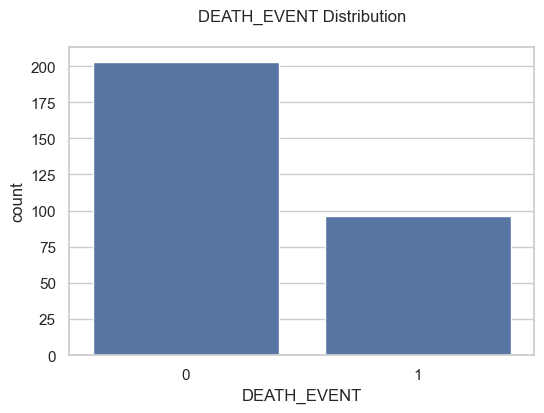

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('DEATH_EVENT Distribution\n')
plt.show()

In [40]:
print(df['DEATH_EVENT'].value_counts())
print(df['DEATH_EVENT'].value_counts(normalize=True))  # Shows percentages

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64
DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64


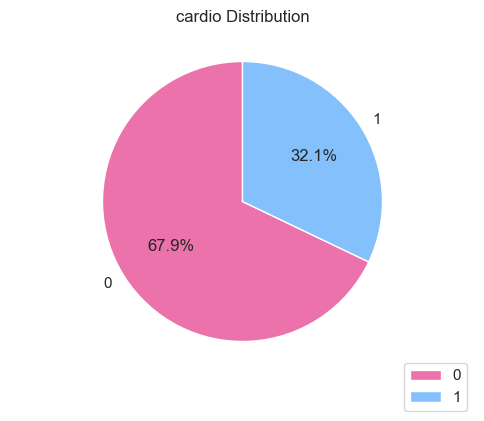

In [41]:
revenue_counts = df['DEATH_EVENT'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('cardio Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

3.3 Split data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

df = pd.DataFrame(X_train, columns=X.columns)
df['DEATH_EVENT'] = y_train

### 4.Visulization

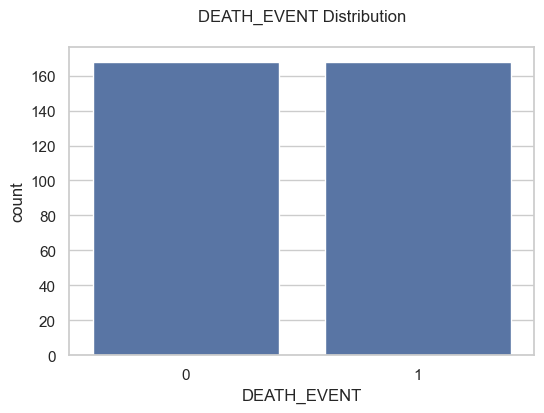

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('DEATH_EVENT Distribution\n')
plt.show()

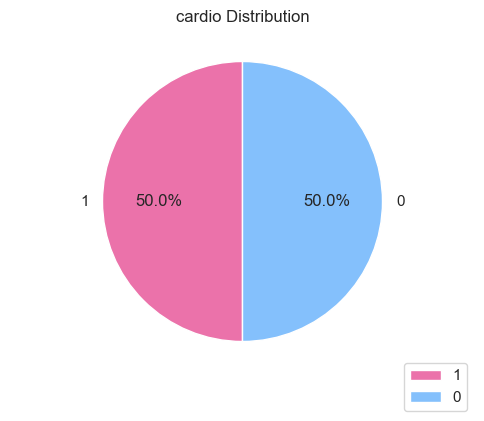

In [46]:
revenue_counts = df['DEATH_EVENT'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('cardio Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

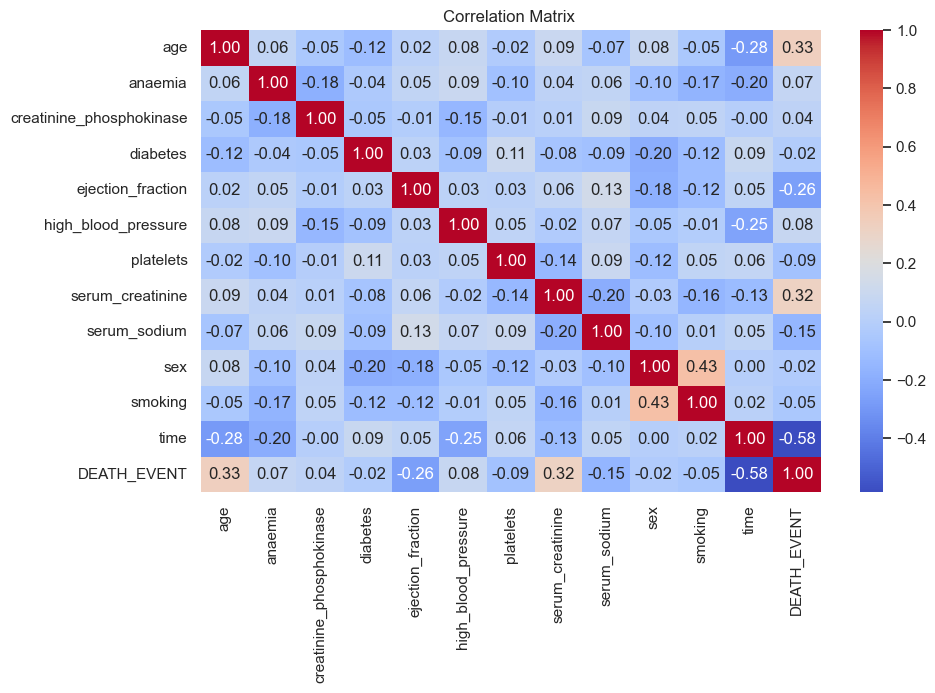

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix ')
plt.xticks(rotation=90)
plt.show()

### 5.Train model

In [48]:
results = {}
# models from 1.1 part
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

c:\Users\mrtat\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [49]:
metrics_df = pd.DataFrame(results).T
metrics_df.index.name = 'Model'
print("\nPerformance Metrics:\n", metrics_df)


Performance Metrics:
                      Accuracy  Precision  Recall  F1-Score
Model                                                     
Logistic Regression  0.800000   0.842105    0.64  0.727273
Decision Tree        0.716667   0.666667    0.64  0.653061
Random Forest        0.766667   0.789474    0.60  0.681818
AdaBoost             0.750000   0.750000    0.60  0.666667
SVM                  0.716667   0.681818    0.60  0.638298


In [50]:
best_model_name = metrics_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on F1-Score: {best_model_name}\n")


Best Model based on F1-Score: Logistic Regression



### confusion Matrix & Classification Report for Best Model

In [52]:
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

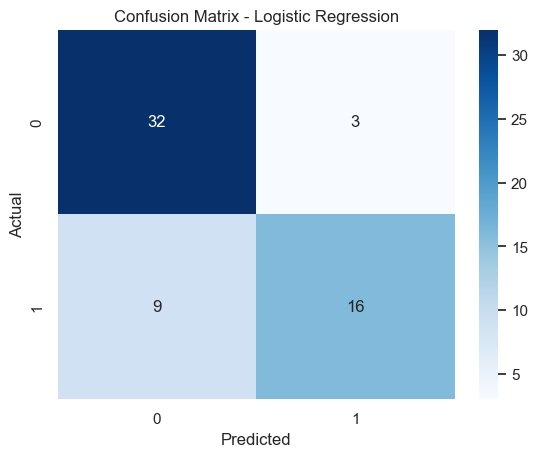

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



In [53]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_best))